In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pathlib import Path
from shapely.geometry import Point
from geopandas import GeoDataFrame
from cartopy.io import shapereader
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn-white')

/var/folders/0g/51ngyll510j8j7tlj08dk5m00000gn/T/ipykernel_1612/253199284.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
ROOT = Path().resolve()
DATA = ROOT / 'data'

In [3]:
df = pd.read_csv(DATA / 'full_data_2013_2023.csv')
print(df.head())

   Unnamed: 0                      time  latitude  longitude  depth  mag  \
0           0  2013-01-31T23:57:01.070Z  -11.0000   165.4960   10.0  4.6   
1           1  2013-01-31T23:40:36.442Z   60.3617  -151.0058   69.6  2.7   
2           2  2013-01-31T23:27:50.960Z   55.7490  -160.8290   15.8  2.5   
3           3  2013-01-31T22:22:51.060Z   19.6250   -65.5160   52.0  3.2   
4           4  2013-01-31T22:03:06.754Z   55.3801  -135.0922   20.0  2.9   

  magType   nst    gap  dmin  ...                   updated  \
0      mb  33.0   90.8   NaN  ...  2014-11-07T01:49:55.379Z   
1      ml   NaN    NaN   NaN  ...  2019-05-13T22:59:09.085Z   
2      ml   9.0  176.8   NaN  ...  2019-05-13T22:59:08.321Z   
3      md   6.0  275.0   NaN  ...  2014-11-07T01:49:55.370Z   
4      ml   NaN    NaN   NaN  ...  2019-05-13T22:59:29.761Z   

                                  place        type horizontalError  \
0     44 km SW of Lata, Solomon Islands  earthquake             NaN   
1         14 km SSE of

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294570 entries, 0 to 294569
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       294570 non-null  int64  
 1   time             294570 non-null  object 
 2   latitude         294570 non-null  float64
 3   longitude        294570 non-null  float64
 4   depth            294570 non-null  float64
 5   mag              294570 non-null  float64
 6   magType          294569 non-null  object 
 7   nst              98227 non-null   float64
 8   gap              262660 non-null  float64
 9   dmin             238991 non-null  float64
 10  rms              292319 non-null  float64
 11  net              294570 non-null  object 
 12  id               294570 non-null  object 
 13  updated          294570 non-null  object 
 14  place            292752 non-null  object 
 15  type             294570 non-null  object 
 16  horizontalError  238776 non-null  floa

In [5]:
print(df.describe())

          Unnamed: 0       latitude      longitude          depth  \
count  294570.000000  294570.000000  294570.000000  294570.000000   
mean   147284.500000      18.606225     -37.203389      57.959296   
std     85035.178735      30.353417     123.704770     109.010954   
min         0.000000     -82.883700    -179.999700      -3.740000   
25%     73642.250000      -5.347600    -151.709175      10.000000   
50%    147284.500000      19.400000     -71.267900      15.400000   
75%    220926.750000      41.899475     107.730675      52.837500   
max    294569.000000      87.386000     179.999900     697.360000   

                 mag           nst            gap           dmin  \
count  294570.000000  98227.000000  262660.000000  238991.000000   
mean        3.767698     33.338909     128.451239       2.587237   
std         0.884589     39.531231      75.602535       4.323811   
min         2.120000      0.000000       7.000000       0.000000   
25%         2.870000     13.000000    

In [6]:
print(df.isnull().sum())

Unnamed: 0              0
time                    0
latitude                0
longitude               0
depth                   0
mag                     0
magType                 1
nst                196343
gap                 31910
dmin                55579
rms                  2251
net                     0
id                      0
updated                 0
place                1818
type                    0
horizontalError     55794
depthError           4809
magError            53228
magNst              48276
status                  0
locationSource          0
magSource               0
dtype: int64


In [7]:
# Since there is only one missing value for magType, we can fill it with the mode
df['magType'] = df['magType'].fillna(df['magType'].mode()[0])

In [8]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year

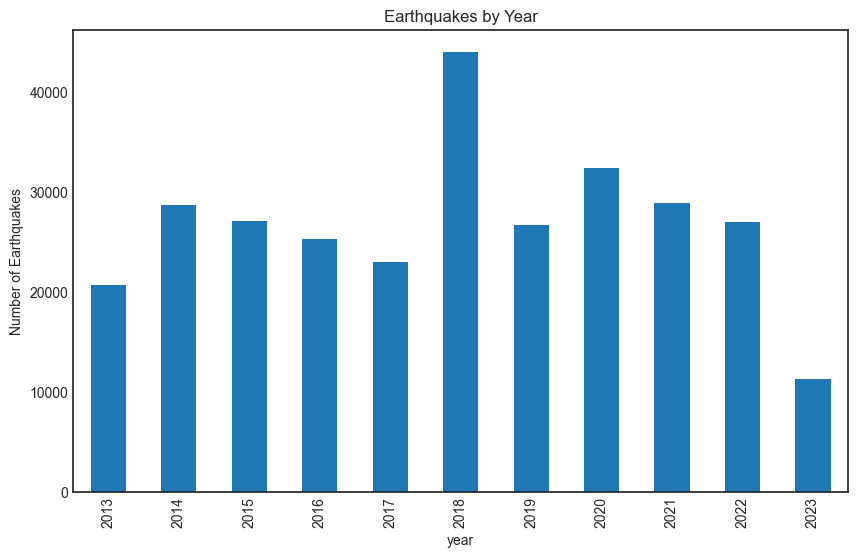

In [9]:
# Number of earthquakes by year
plt.figure(figsize=(10,6))
plt.title('Earthquakes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
df.groupby('year').count()['time'].plot(kind='bar')
plt.show()

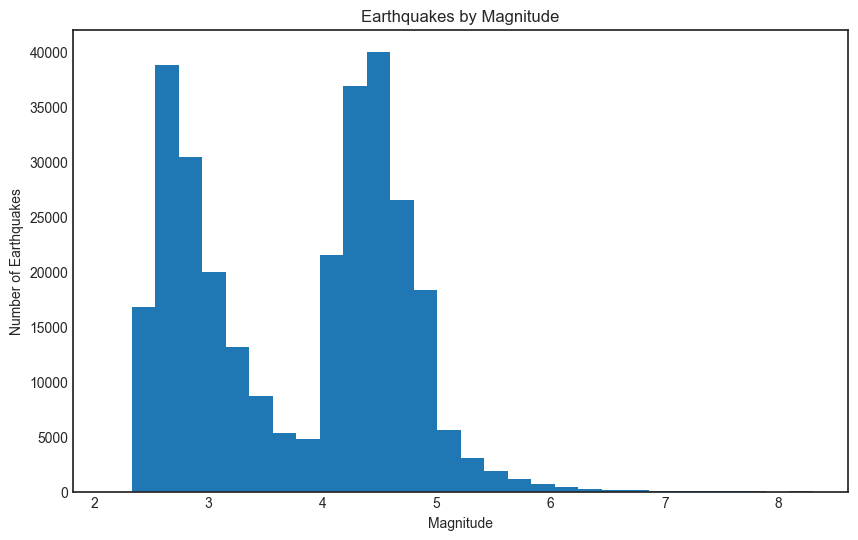

In [10]:
# Distribution of earthquakes by magnitude
plt.figure(figsize=(10,6))
plt.title('Earthquakes by Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Number of Earthquakes')
plt.hist(df["mag"], bins=30)
plt.show()

In [11]:
# get location from place
df['location'] = df['place'].str.replace('.*,\\s*', '', regex=True)

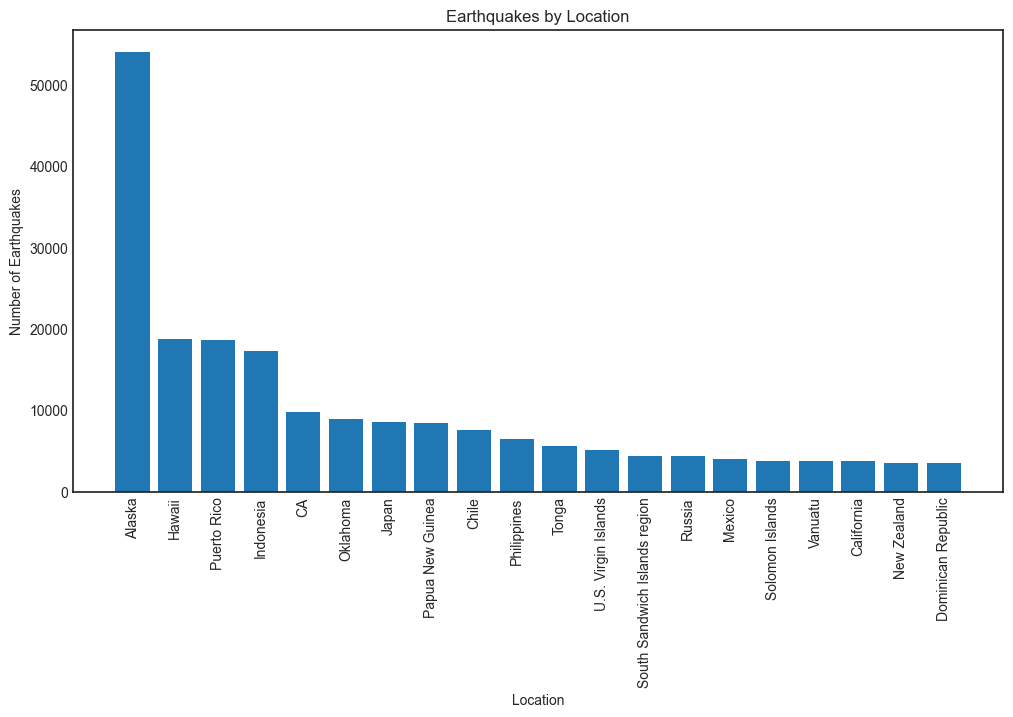

In [12]:
# Number of earthquakes by location
plt.figure(figsize=(12,6))
plt.title('Earthquakes by Location')
plt.xlabel('Location')
plt.ylabel('Number of Earthquakes')
plt.bar(df['location'].value_counts().head(20).index, df['location'].value_counts().head(20))
plt.xticks(rotation=90)
plt.show()

In [13]:
# filter top 5 locations with highest number of earthquakes
top_locations = df['location'].value_counts().head(5)

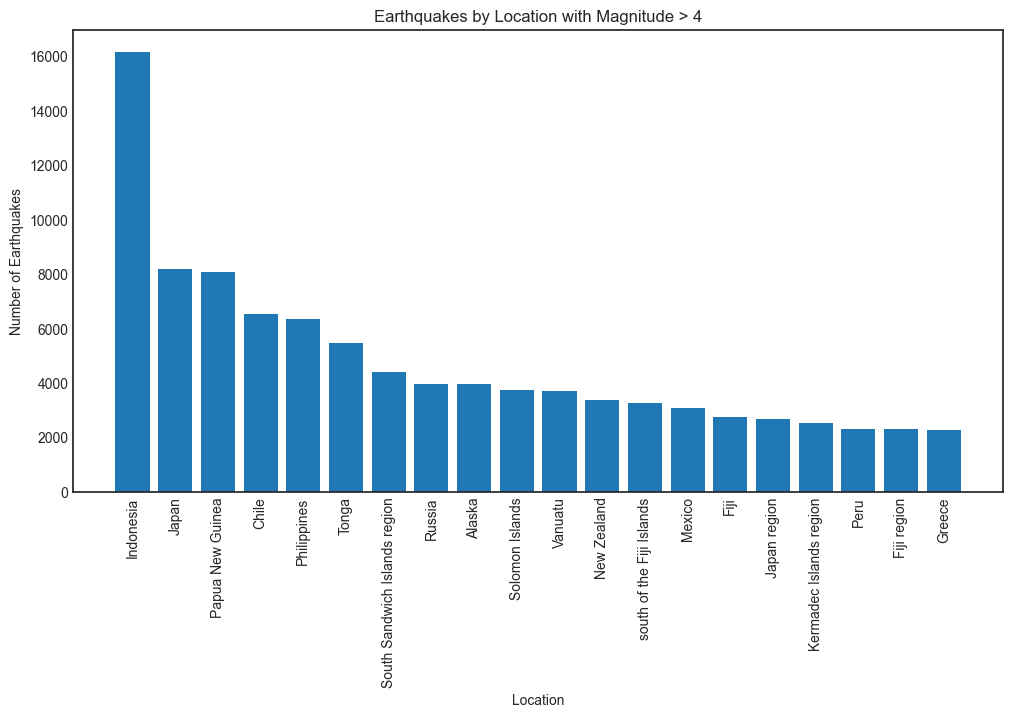

In [14]:
# filter locations with magnitude greater than 4
location_mag_4 = df[df['mag'] > 4]['location']

# plot
plt.figure(figsize=(12,6))
plt.title('Earthquakes by Location with Magnitude > 4')
plt.xlabel('Location')
plt.ylabel('Number of Earthquakes')
plt.bar(location_mag_4.value_counts().head(20).index, location_mag_4.value_counts().head(20))
plt.xticks(rotation=90)
plt.show()

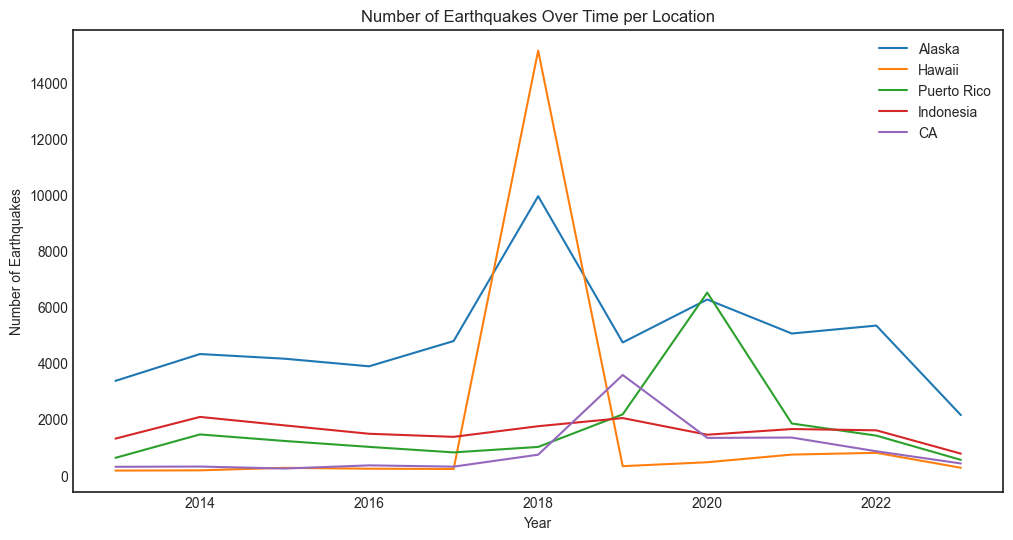

In [15]:
# check for local trend
fig, ax = plt.subplots(figsize=(12,6))

for location in top_locations.index:
    # Filter dataframe to only include rows with this location
    location_df = df[df['location'] == location]

    # Count the number of earthquakes in each year
    yearly_counts = location_df['year'].value_counts().sort_index()

    # Plot the yearly counts
    ax.plot(yearly_counts.index, yearly_counts.values, label=location)

# Add labels and title
plt.title('Number of Earthquakes Over Time per Location')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.legend()

plt.show()


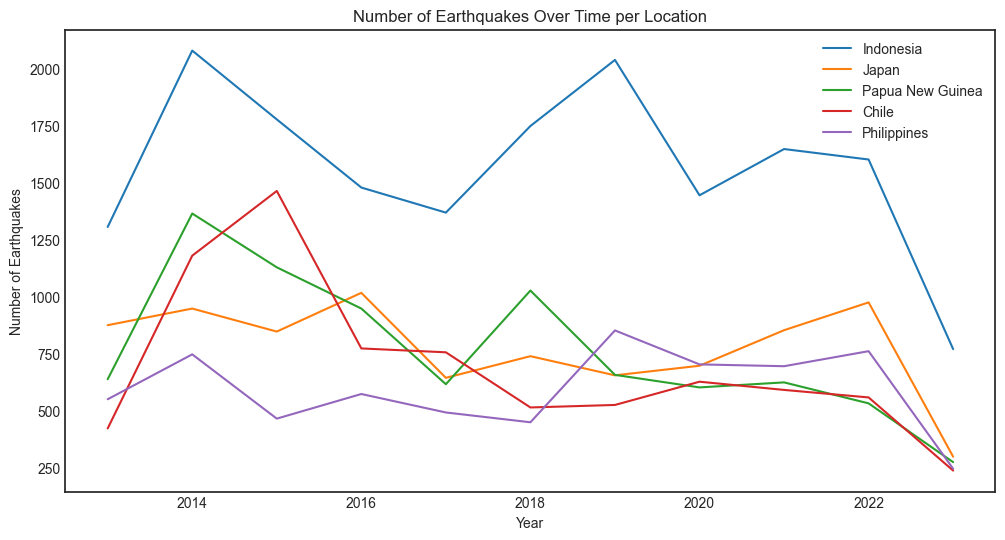

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

for location in location_mag_4.value_counts().head(5).index:
    # Filter dataframe to only include rows with this location
    location_df = df[df['location'] == location]

    # Count the number of earthquakes in each year
    yearly_counts = location_df['year'].value_counts().sort_index()

    # Plot the yearly counts
    ax.plot(yearly_counts.index, yearly_counts.values, label=location)

# Add labels and title
plt.title('Number of Earthquakes Over Time per Location')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.legend()

plt.show()

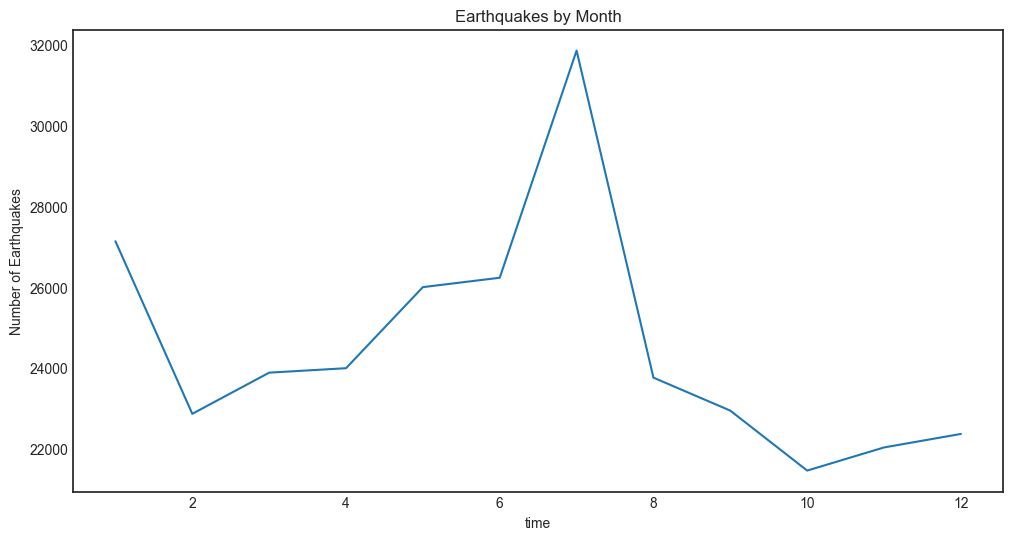

In [17]:
# plot a line graph of the number of earthquakes per month
plt.figure(figsize=(12,6))
plt.title('Earthquakes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
df.groupby(df['time'].dt.month).count()['time'].plot(kind='line')
plt.show()

In [18]:
# Check this trend with a yearly frequency

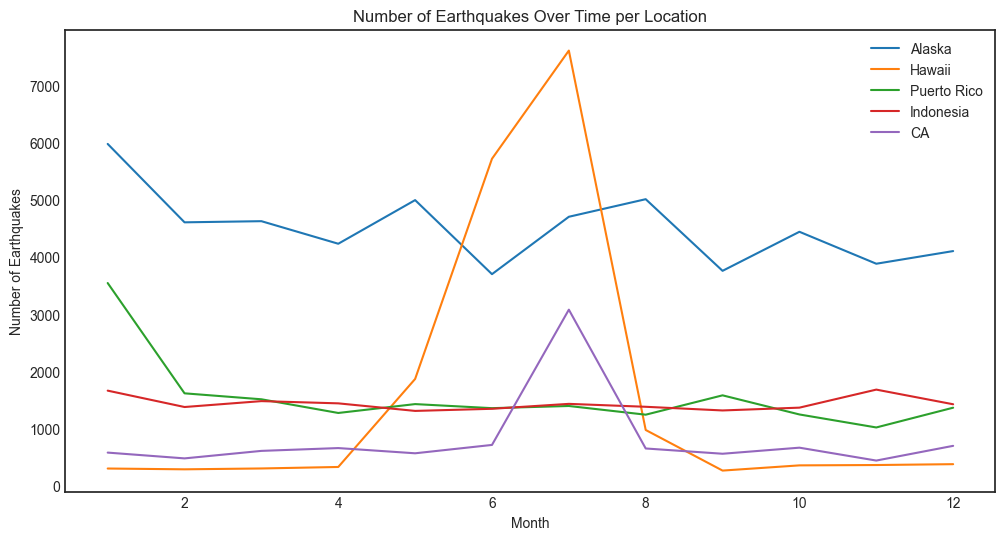

In [19]:
# plot a line graph for top 10 locations for magnitude with highest number of earthquakes per month
fig, ax = plt.subplots(figsize=(12,6))

for location in top_locations.index:
    # Filter dataframe to only include rows with this location
    location_df = df[df['location'] == location]

    # Count the number of earthquakes in each month
    monthly_counts = location_df['time'].dt.month.value_counts().sort_index()

    # Plot the monthly counts
    ax.plot(monthly_counts.index, monthly_counts.values, label=location)

# Add labels and title
plt.title('Number of Earthquakes Over Time per Location')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.legend()


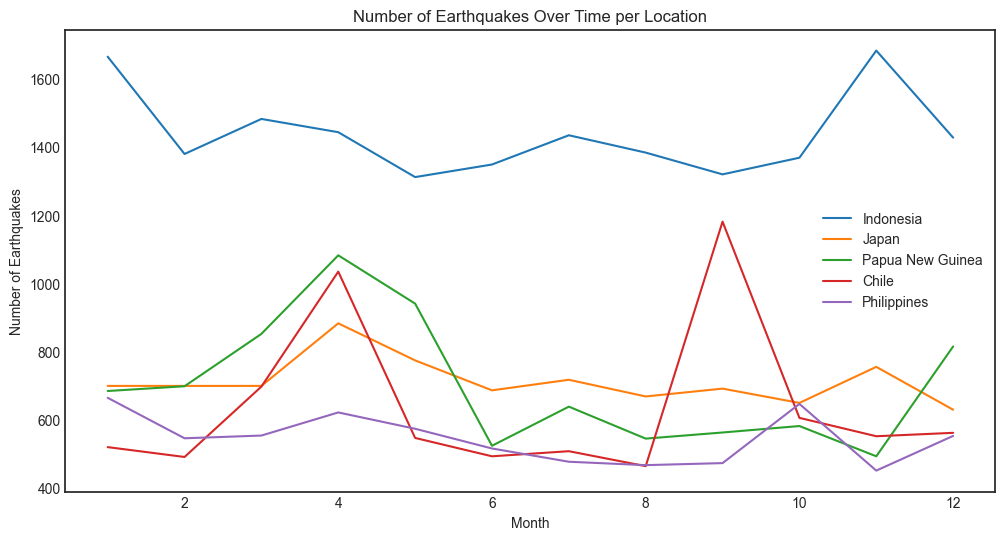

In [20]:
# plot a line graph for top 10 locations for magnitude greater than 4 with highest number of earthquakes per month
fig, ax = plt.subplots(figsize=(12,6))

for location in location_mag_4.value_counts().head(5).index:
    # Filter dataframe to only include rows with this location
    location_df = df[df['location'] == location]

    # Count the number of earthquakes in each month
    monthly_counts = location_df['time'].dt.month.value_counts().sort_index()

    # Plot the monthly counts
    ax.plot(monthly_counts.index, monthly_counts.values, label=location)

# Add labels and title
plt.title('Number of Earthquakes Over Time per Location')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.legend()

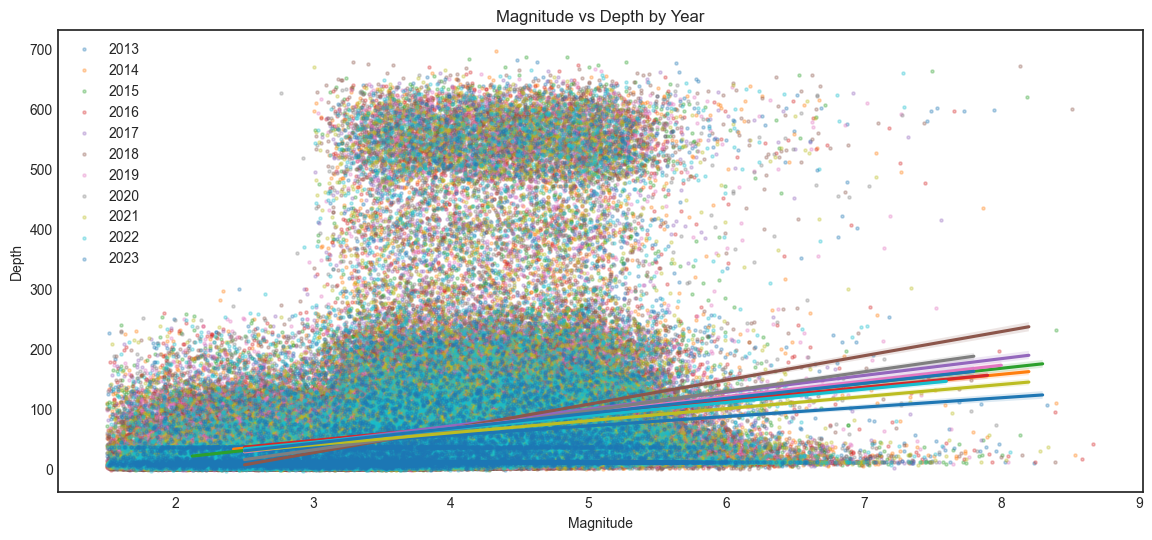

In [21]:
# plot magnitude vs depth by month
plt.figure(figsize=(14,6))
plt.title('Magnitude vs Depth by Year')

for year in df['time'].dt.year.unique():
    year_df = df[df['time'].dt.year == year]
    sns.regplot(x=year_df['mag'], y=year_df['depth'], label=year, x_jitter=True, scatter_kws={'alpha':0.3, 's':5})

# sns.relplot(data=df, x='year', y='depth', sizes='mag', **{'alpha':0.3, 's':5})

plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.legend()
plt.show()


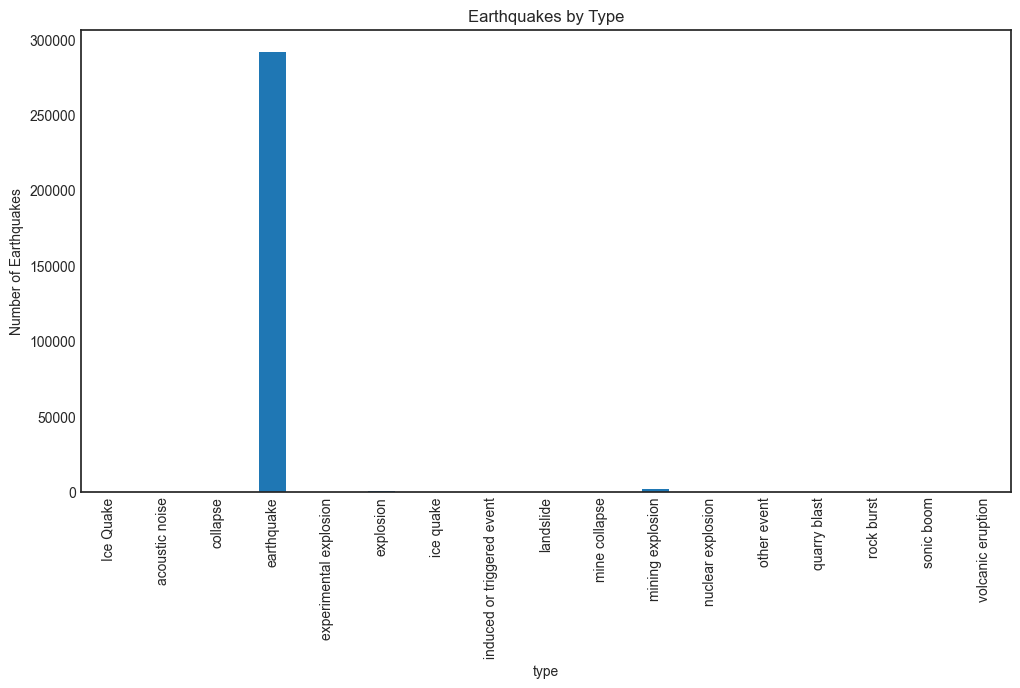

In [22]:
# plot type of earthquake
plt.figure(figsize=(12,6))
plt.title('Earthquakes by Type')
plt.xlabel('Type')
plt.ylabel('Number of Earthquakes')
df.groupby('type').count()['time'].plot(kind='bar')
plt.show()

In [23]:
geometry = gpd.points_from_xy(df['longitude'], df['latitude'])
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

/Users/parthshah/Desktop/repo/earthquake_analysis/.venv/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [24]:
cmap = plt.cm.get_cmap('viridis')

/var/folders/0g/51ngyll510j8j7tlj08dk5m00000gn/T/ipykernel_1612/1454545130.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


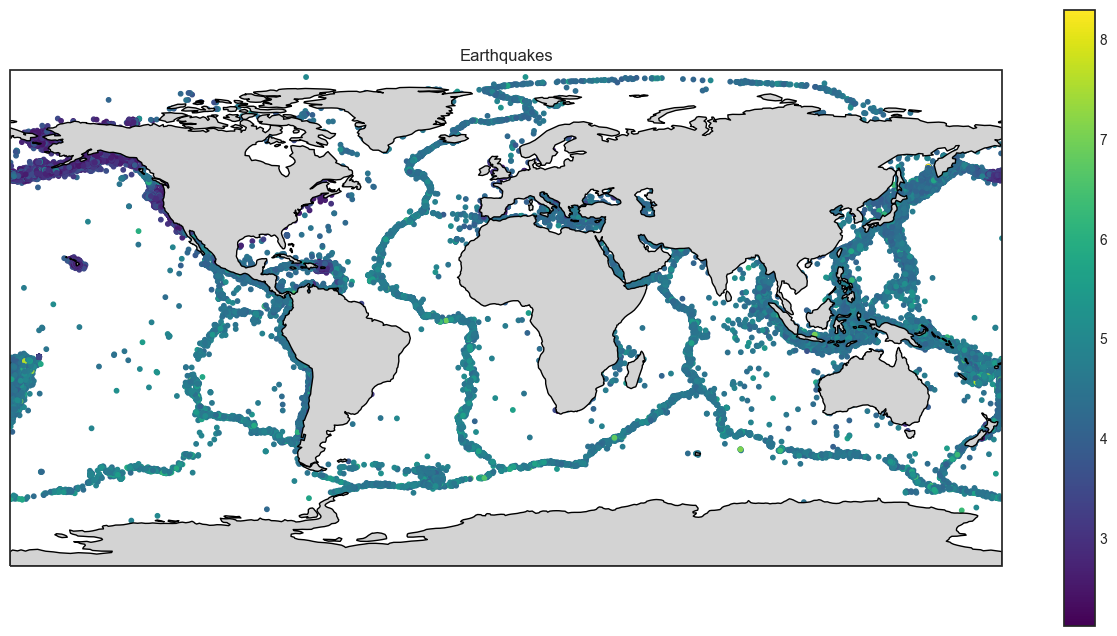

In [25]:
fig, ax = plt.subplots(figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})
shapefile = shapereader.natural_earth(resolution='110m', category='physical', name='land')
ax.add_geometries(shapereader.Reader(shapefile).geometries(), ccrs.PlateCarree(), facecolor='lightgray', edgecolor='black')
gdf.plot(ax=ax, marker='o', markersize=10, column='mag', cmap=cmap, legend=True)
plt.title('Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/var/folders/0g/51ngyll510j8j7tlj08dk5m00000gn/T/ipykernel_1612/1574856069.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


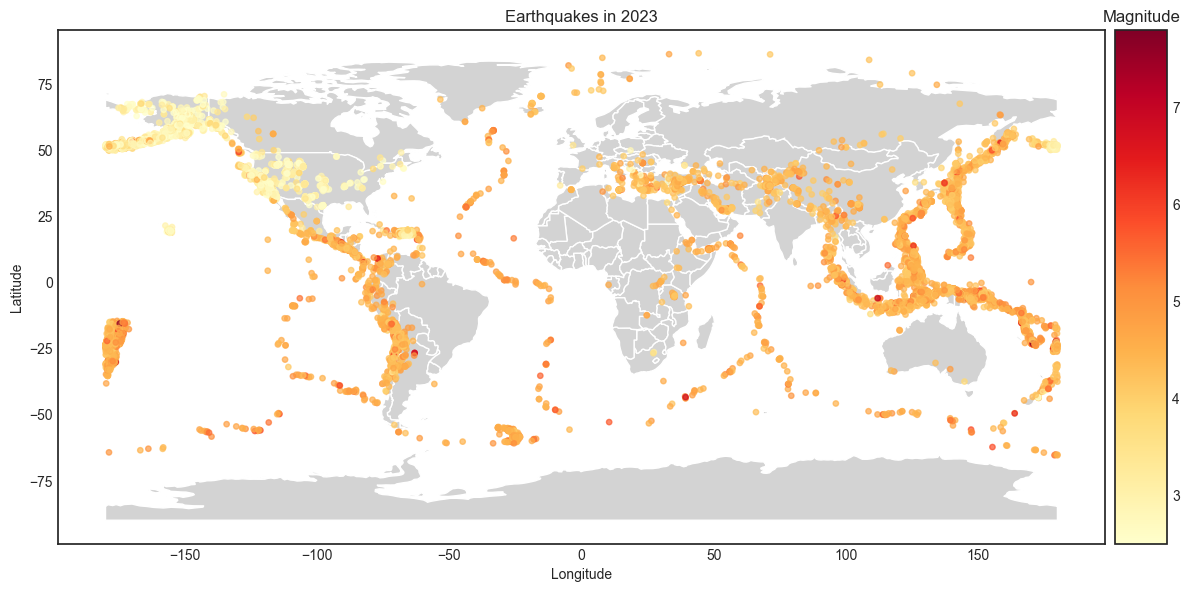

In [26]:
df = df[df['year'] == 2023]

geometry = gpd.points_from_xy(df['longitude'], df['latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Create the map figure with subplots
fig, ax = plt.subplots(figsize=(12, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Load a world map shapefile as the background
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgray', edgecolor='white')

# Plot the earthquakes on the map with color and size based on magnitude
sc = gdf.plot(ax=ax, markersize=15, column='mag', cmap='YlOrRd', alpha=0.7, legend=True, cax=cax)

# Set plot title and labels
ax.set_title('Earthquakes in 2023')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Adjust colorbar
cax.set_title('Magnitude')
cax.patch.set_alpha(1.0)  # Set colorbar background to be non-transparent

# Show the map
plt.tight_layout()
plt.show()

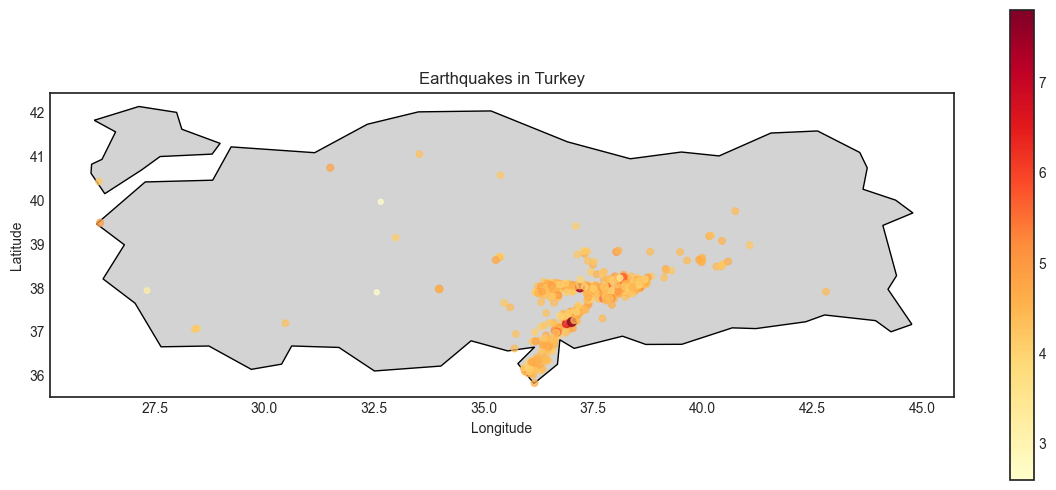

In [27]:
turkey = world[world['name'] == 'Turkey']

# Create a plot with a specific size and projection for Turkey
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_aspect('auto')
turkey.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the earthquakes within Turkey
gdf_turkey = gdf[gdf.within(turkey.geometry.iloc[0])]
gdf_turkey.plot(ax=ax, markersize=gdf_turkey['mag'] * 5, column='mag', cmap='YlOrRd', alpha=0.7, legend=True)

# Set plot title and labels
ax.set_title('Earthquakes in Turkey')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.tight_layout()
plt.show()

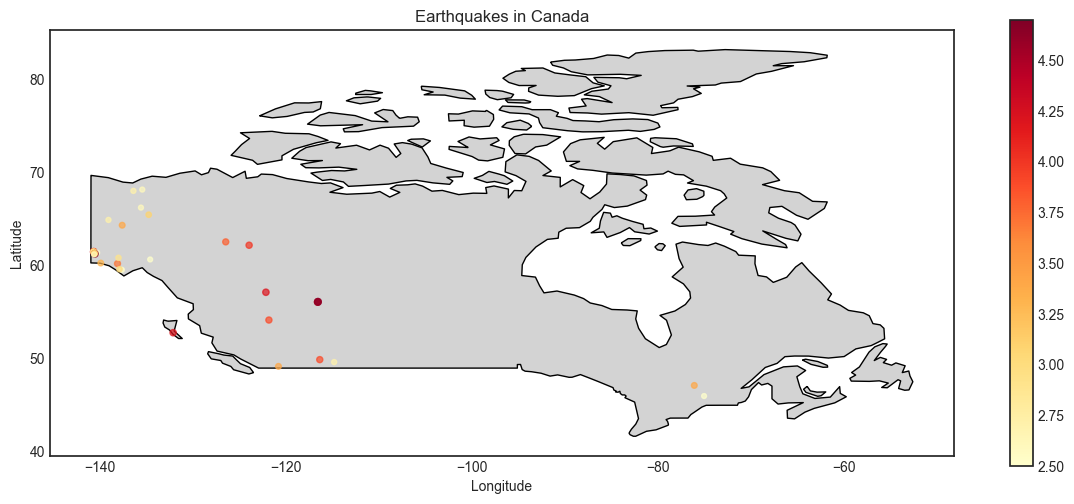

In [28]:
canada = world[world['name'] == 'Canada']

# Create a plot with a specific size and projection for Canada
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_aspect('auto')
canada.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the earthquakes within Canada
gdf_canada = gdf[gdf.within(canada.geometry.iloc[0])]
gdf_canada.plot(ax=ax, markersize=gdf_canada['mag'] * 5, column='mag', cmap='YlOrRd', alpha=0.7, legend=True)

# Set plot title and labels
ax.set_title('Earthquakes in Canada')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.tight_layout()
plt.show()